<a href="https://colab.research.google.com/github/Shulabh-968026/Classifiction_ML_algo/blob/master/TextClassificationbyNaiveBayse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#impirt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
#import dataset from sklearn 
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
 'comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt',
 'sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast',
 'talk.politics.misc','talk.religion.misc']

train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [ ]:
#import neccessary package
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#creating a model based on Multinomial Naive bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#train the model with training dataset
model.fit(train.data,train.target)
#creating label for the test data
labels=model.predict(test.data)

Accuracy score:: 77.38980350504514 %


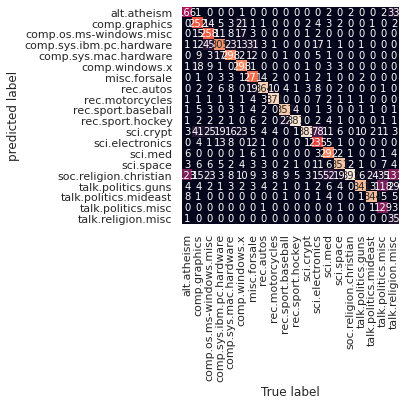

In [ ]:
#creating cunfusion matrix and heatmap
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel("True label")
plt.ylabel("predicted label")
print("Accuracy score::",accuracy_score(test.target,labels)*100,"%")

In [ ]:
#predicting new data based on training data set
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category("Jesus")

'soc.religion.christian'

In [ ]:
predict_category("send to international space station")

'sci.space'